# LSA & LDA Results Visualization

This notebook demonstrates how to load and visualize the `.pkl` results from your topic modeling pipeline.

In [10]:
! pip install wordcloud


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [14]:
# Import required libraries
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
%matplotlib inline

## 1. Load Data using Kedro Catalog

In [15]:
# Option 1: Use Kedro catalog (recommended for Kedro projects)
try:
    # When running 'kedro jupyter notebook', context is automatically available
    catalog = context.catalog
    print("✅ Using Kedro catalog")
except NameError:
    # Option 2: Load pickle files directly (works anywhere)
    print("📂 Loading data directly from pickle files...")
    import pickle
    
    def load_pkl(filepath):
        with open(filepath, 'rb') as f:
            return pickle.load(f)
    
    # Create a simple catalog-like dict
    class SimpleCatalog:
        def load(self, name):
            file_map = {
                'lsa_results_2006_2015': '../data/07_model_output/lsa_results_2006_2015.pkl',
                'lsa_results_2016_2025': '../data/07_model_output/lsa_results_2016~2025.pkl',
                'lda_results_2006_2015': '../data/07_model_output/lda_results_2006_2015.pkl',
                'lda_results_2016_2025': '../data/07_model_output/lda_results_2016~2025.pkl',
                'lsa_topic_comparison': '../data/08_reporting/lsa_topic_comparison.csv',
                'lda_topic_comparison': '../data/08_reporting/lda_topic_comparison.csv',
            }
            filepath = file_map.get(name)
            if filepath.endswith('.pkl'):
                return load_pkl(filepath)
            elif filepath.endswith('.csv'):
                return pd.read_csv(filepath)
    
    catalog = SimpleCatalog()
    print("✅ Using direct file loading")

print("Catalog ready!")

[12/07/25 22:44:11] INFO     Kedro is sending anonymous usage data with the sole purpose of improving ]8;id=805761;file:///Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/kedro_telemetry/plugin.py\plugin.py]8;;\:]8;id=456854;file:///Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/kedro_telemetry/plugin.py#243\243]8;;\
                             the product. No personal data or IP addresses are stored on our side. To              
                             opt out, set the `KEDRO_DISABLE_TELEMETRY` or `DO_NOT_TRACK` environment              
                             variables, or create a `.telemetry` file in the current working                       
                             directory with the contents `consent: false`. To hide this message,                   
                             explicitly grant or deny consent. Read more at                                        
                             https://docs.kedro.org/en/stable/configuration/telemetry.html                         

✅ Using Kedro catalog
Catalog ready!


## 2. Load LSA Results

In [16]:
# Load LSA results for both periods
lsa_2006 = catalog.load('lsa_results_2006_2015')
lsa_2016 = catalog.load('lsa_results_2016_2025')

print("LSA 2006-2015 Results Keys:")
print(list(lsa_2006.keys()))

print("\nTotal Variance Explained (2006-2015):", f"{lsa_2006['total_variance_explained']:.2%}")
print("Total Variance Explained (2016-2025):", f"{lsa_2016['total_variance_explained']:.2%}")

[12/07/25 22:44:18] INFO     Loading data from lsa_results_2006_2015 (PickleDataset)...        ]8;id=904856;file:///Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=766618;file:///Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/kedro/io/data_catalog.py#1048\1048]8;;\

                    INFO     Loading data from lsa_results_2016_2025 (PickleDataset)...        ]8;id=786742;file:///Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=609068;file:///Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/kedro/io/data_catalog.py#1048\1048]8;;\

LSA 2006-2015 Results Keys:
['model', 'doc_topic_matrix', 'topic_term_matrix', 'topic_terms', 'doc_topics', 'explained_variance', 'total_variance_explained', 'feature_names']

Total Variance Explained (2006-2015): 84.14%
Total Variance Explained (2016-2025): 88.70%


## 3. Visualize LSA Topics - Top Terms

In [17]:
# Display topic terms
print("\n=== LSA Topics (2006-2015) ===")
display(lsa_2006['topic_terms'])

print("\n=== LSA Topics (2016-2025) ===")
display(lsa_2016['topic_terms'])


=== LSA Topics (2006-2015) ===


,topic_id,top_terms,term_weights
0,0,"部落, 泰雅族, 原住民, 庫斯, 傳統, 泰雅, 文化, 司馬, 族人, 鎮西堡, 依倚,...","[0.2581999560441988, 0.15415979326073392, 0.15..."
1,1,"警方, 現場, 樹林, 發現, 突然, 打獵, 公尺, 有人, 打電話, 不到, 相驗, 不...","[0.23418502231697494, 0.17601276893033507, 0.1..."
2,2,"傳統, 鎮西堡, 小米, 鎮西堡 部落, 部落, 依倚, 文化, 庫斯 部落, 領域, 協會...","[0.1785664447533783, 0.1619525751606936, 0.145..."
3,3,"依倚, 庫斯 部落, 庫斯, 司馬, 拉互, 拉互 依倚, 司馬 庫斯, 領域, 故事, 臉...","[0.23566880637330984, 0.2242156494948488, 0.19..."
4,4,"雲天, 原民會, 公尺, 鄉長, 鄉長 雲天, 當地, 縣長, 邱鏡淳, 民族, 萬元, 觀...","[0.23154335983297689, 0.20740465551161216, 0.1..."
5,5,"小米, 鎮西堡, 鎮西堡 部落, 協會 理事, 不能, 理事, 每年, 祖靈, 部落, 傳統...","[0.25275954500021613, 0.2169000511717353, 0.18..."
6,6,"突然, 祖靈, 出現, 泰雅族, 墜谷, 族人, 事件, 雲天, 峭壁, 參加, 祈福, 不...","[0.20539407420147457, 0.19005701950505338, 0.1..."
7,7,"小米, 發現, 豪雨, 而且, 可能, 因為, 日本, 可以, 許多, 尖石 鄉後山, 鄉後...","[0.30153883909797047, 0.17727528927132305, 0.1..."
8,8,"祖靈, 事件, 突然, 當地, 有人, 東方, 依倚, 庫斯 部落, 兼具, 導覽, 鄰近,...","[0.20560557009287744, 0.15939389217767008, 0.1..."
9,9,"傳統, 小米, 發展, 台灣, 交通不便, 泰雅族 傳統, 地方, 保留, 牧師, 教育, ...","[0.21010414031280455, 0.20225895337147784, 0.1..."



=== LSA Topics (2016-2025) ===


,topic_id,top_terms,term_weights
0,0,"部落, 公所, 表示, 縣府, 遊客, 今天, 目前, 控溪, 安全, 相關, 交通, 泰雅...","[0.18137647558083922, 0.15474786917252448, 0.1..."
1,1,"控溪 部落, 控溪, 山頭, 撤離, 早上, 當地, 溢流, 注意, 今天 早上, 單位, ...","[0.158121292985792, 0.15554409446838213, 0.147..."
2,2,"遊客, 車潮, 交通, 尖峰, 直接, 一度, 道路, 內灣, 通往, 受傷, 搶救, 調查...","[0.2346374910737615, 0.20293299797290854, 0.18..."
3,3,"消防局, 患者, 前往, 男子, 尖石 鄉新樂村, 鄉新樂村, 地形, 情形, 點分, 新竹...","[0.24973705131167048, 0.22123098969862282, 0.2..."
4,4,"所在, 尖石 大橋, 大橋, 勇士, 泰雅, 文科, 地點, 搶救, 受傷, 相當, 調查,...","[0.1923226929797288, 0.1923226929797288, 0.192..."
5,5,"墜落, 患者, 泰雅, 勇士, 單位, 男子, 地形, 安全, 進入, 公尺, 鄉長, 人車...","[0.1656830132685224, 0.15604990830422413, 0.15..."
6,6,"公共, 服務, 交通部, 全新, 紅葉, 山頭, 相當, 民眾, 文科, 現有, 關心, 交...","[0.21355067472652303, 0.2084413647883465, 0.20..."
7,7,"撤離, 竹線, 全新, 拒絕, 大家, 影響, 歷史, 道路, 已經, 今天, 勸導, 鄉長...","[0.24626523688637963, 0.1929208745814688, 0.15..."
8,8,"縣府, 目前, 處長, 溢流, 持續, 很多 遊客, 中央, 控溪 部落, 公頃, 面積, ...","[0.1757746430440849, 0.16780827853771102, 0.15..."
9,9,"曾國大 表示, 體驗, 原住民, 生活, 初步, 推動, 公頃, 天然, 建議, 休閒, 精...","[0.1660124864159674, 0.15713682546454585, 0.14..."


## 4. Visualize Explained Variance

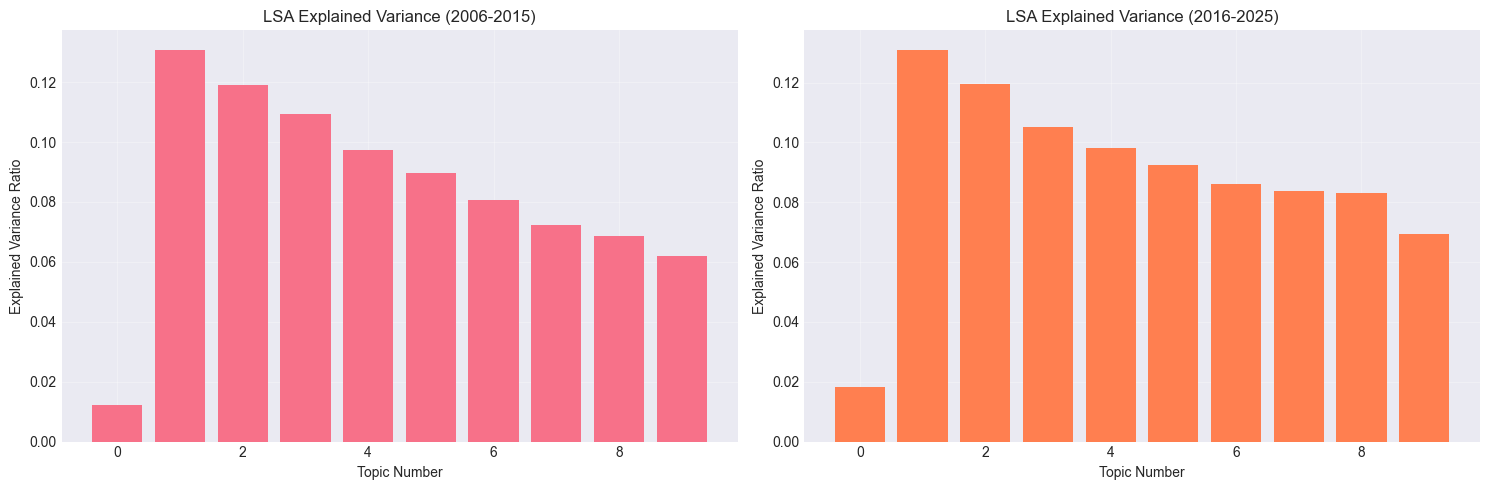

In [18]:
# Plot explained variance for both periods
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# 2006-2015
axes[0].bar(range(len(lsa_2006['explained_variance'])), 
            lsa_2006['explained_variance'])
axes[0].set_xlabel('Topic Number')
axes[0].set_ylabel('Explained Variance Ratio')
axes[0].set_title('LSA Explained Variance (2006-2015)')
axes[0].grid(True, alpha=0.3)

# 2016-2025
axes[1].bar(range(len(lsa_2016['explained_variance'])), 
            lsa_2016['explained_variance'], color='coral')
axes[1].set_xlabel('Topic Number')
axes[1].set_ylabel('Explained Variance Ratio')
axes[1].set_title('LSA Explained Variance (2016-2025)')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 5. Word Clouds for LSA Topics

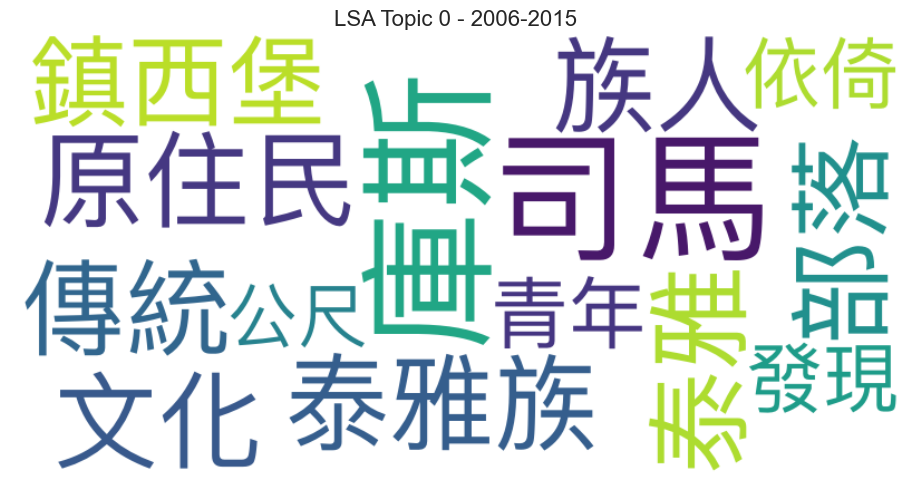

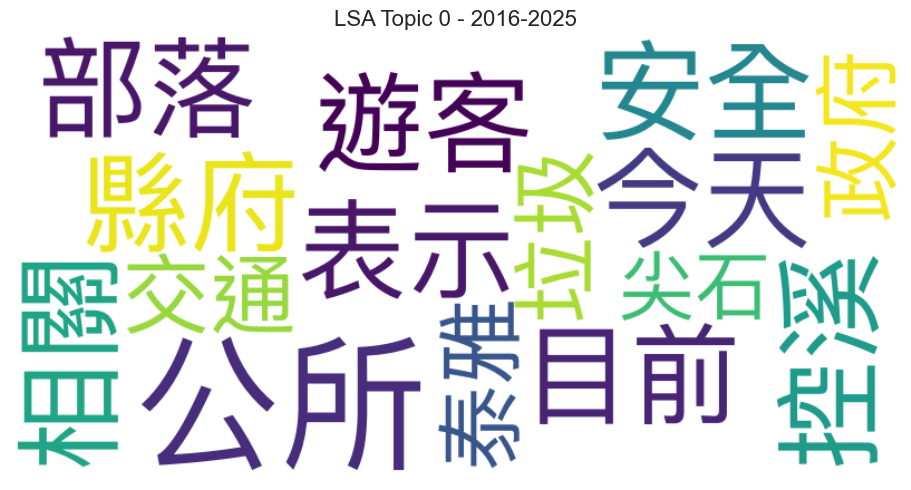

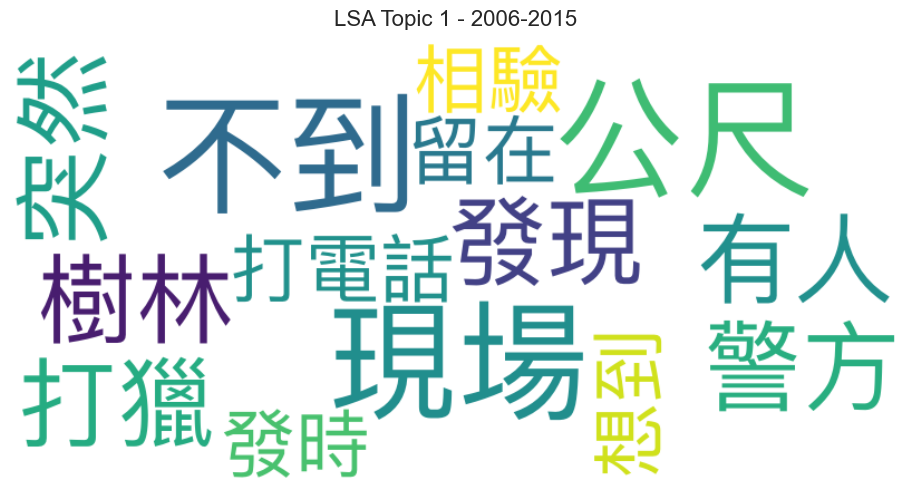

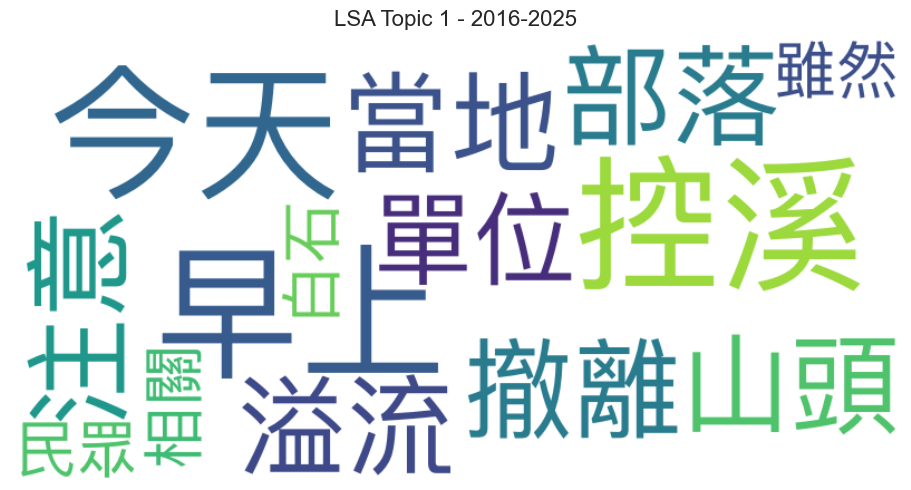

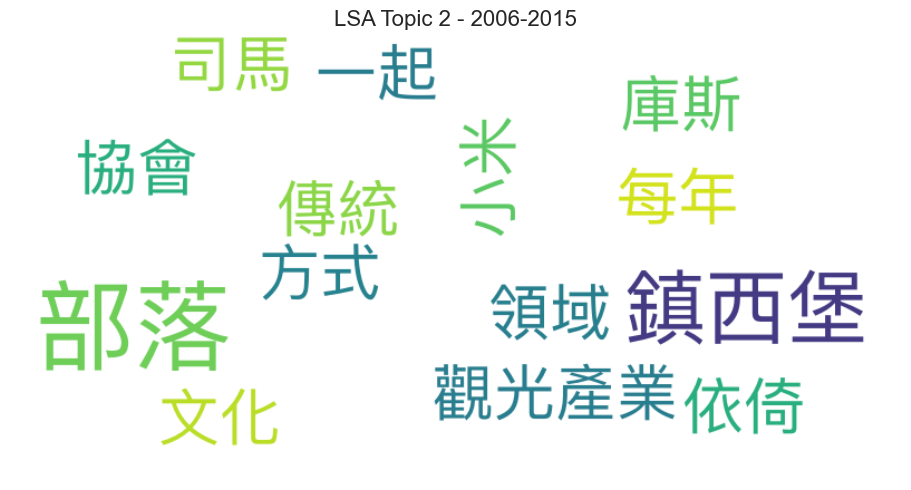

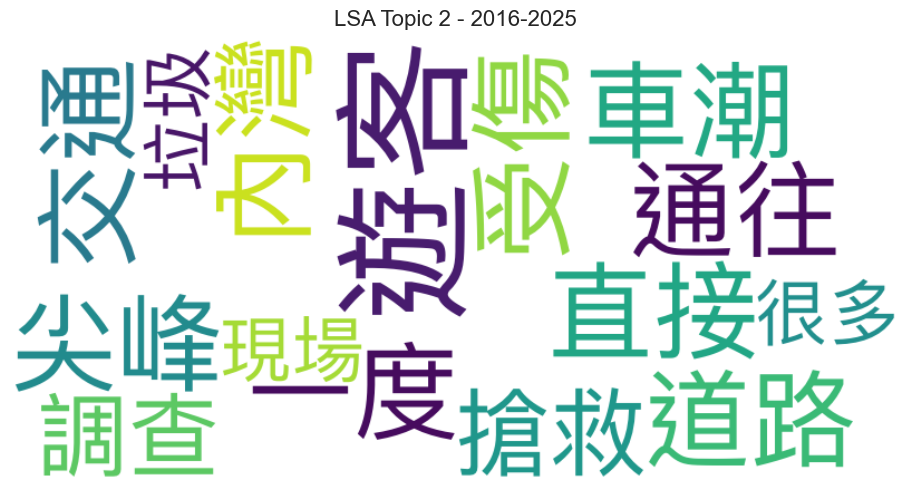

In [18]:
def create_topic_wordcloud(topic_terms_df, topic_id, period):
    """Create word cloud for a specific topic"""
    terms = topic_terms_df.iloc[topic_id]['top_terms']
    
    # Create word cloud
    wordcloud = WordCloud(width=800, height=400, 
                          background_color='white',
                          font_path='/System/Library/Fonts/PingFang.ttc',  # Chinese font
                          ).generate(terms)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'LSA Topic {topic_id} - {period}', fontsize=16)
    plt.tight_layout()
    plt.show()

# Show word clouds for first 3 topics
for i in range(min(3, len(lsa_2006['topic_terms']))):
    create_topic_wordcloud(lsa_2006['topic_terms'], i, '2006-2015')
    create_topic_wordcloud(lsa_2016['topic_terms'], i, '2016-2025')

## 6. Load LDA Results

In [20]:
# Load LDA results
lda_2006 = catalog.load('lda_results_2006_2015')
lda_2016 = catalog.load('lda_results_2016_2025')

print("LDA 2006-2015 Results Keys:")
print(list(lda_2006.keys()))

print("\nPerplexity (2006-2015):", lda_2006['perplexity'])
print("Perplexity (2016-2025):", lda_2016['perplexity'])
print("\nLog Likelihood (2006-2015):", lda_2006['log_likelihood'])
print("Log Likelihood (2016-2025):", lda_2016['log_likelihood'])

LDA 2006-2015 Results Keys:
['model', 'doc_topic_matrix', 'topic_term_matrix', 'topic_terms', 'doc_topics', 'perplexity', 'log_likelihood', 'feature_names']

Perplexity (2006-2015): 319.2517595020557
Perplexity (2016-2025): 407.329323772757

Log Likelihood (2006-2015): -5247.04180569536
Log Likelihood (2016-2025): -7043.2769928797525


## 7. Visualize LDA Topics

In [21]:
# Display LDA topic terms
print("\n=== LDA Topics (2006-2015) ===")
display(lda_2006['topic_terms'])

print("\n=== LDA Topics (2016-2025) ===")
display(lda_2016['topic_terms'])


=== LDA Topics (2006-2015) ===


,topic_id,top_terms,term_probabilities
0,0,"部落, 泰雅族, 庫斯, 依倚, 傳統, 司馬, 庫斯 部落, 文化, 司馬 庫斯, 原住民...","[0.2015902622166328, 0.09718411809234512, 0.08..."
1,1,"泰雅, 一名, 家人, 不過, 身體, 目前, 母親, 老人, 百歲, 當時, 人瑞, 昨天...","[0.09839955491003226, 0.09839916857329177, 0.0..."
2,2,"族人, 生活, 泰雅, 上山, 民族, 人瑞, 感謝, 縣長, 母親, 老人, 邱鏡淳, 相...","[0.10506528187144343, 0.0711877148448548, 0.07..."
3,3,"祖靈, 突然, 族人, 出現, 發現, 西堡, 九月, 事件, 有人, 泰雅族, 表示, 墜...","[0.13970991621457576, 0.13970627496923432, 0.0..."
4,4,"警方, 多年, 打獵, 樹林, 發現, 夜間, 可能, 原住民, 留在 現場, 加上, 留在...","[0.13774515181471117, 0.09332030524117252, 0.0..."
5,5,"部落, 小米, 泰雅族, 泰雅族 傳統, 文化, 傳統, 方式, 泰雅, 原住民, 歷史, ...","[0.06726526435758304, 0.066854384147888, 0.066..."
6,6,"小米, 部落, 當地, 因為, 公尺, 而且, 鄉後山, 原民會, 雲天, 尖石 鄉後山, ...","[0.19994356477970335, 0.17530342493970538, 0.0..."
7,7,"部落, 原住民, 公尺, 最近, 現場, 山谷, 發現, 青年, 遊客, 鎮西堡, 警方, ...","[0.24641397479067959, 0.10450792819881034, 0.0..."
8,8,"公所, 當年, 表示, 體驗, 尖石 公所, 觀光產業, 保留, 觀光, 導覽, 兼具, 公...","[0.16074036621270765, 0.0823484434271721, 0.08..."
9,9,"建設, 相當, 甚至, 通常, 山谷, 尖石 泰雅族, 可以, 不少, 加上, 隨處, 公里...","[0.06668996946377889, 0.06668164027484078, 0.0..."



=== LDA Topics (2016-2025) ===


,topic_id,top_terms,term_probabilities
0,0,"公所, 縣府, 部落, 需要, 園區, 表示, 計畫, 土地, 設施, 目前, 爭取, 體驗...","[0.12386285548720824, 0.08066219452585117, 0.0..."
1,1,"山頭, 民眾, 紅葉, 文科, 相當, 部落, 開始, 近期, 其中 尖石, 今天, 說明,...","[0.137741027664106, 0.09331897529219445, 0.093..."
2,2,"勇士, 泰雅, 文科, 公尺, 縣長, 鄉長 曾國大, 今天, 公所, 周邊, 萬元, 鄉長...","[0.23491801093943054, 0.19608149586347784, 0.0..."
3,3,"泰雅, 勇士, 台灣, 當地, 白石, 大橋, 包含, 尖石 尖石, 單位, 所在, 環境,...","[0.06691089177653797, 0.06676486940343809, 0.0..."
4,4,"泰雅, 勇士, 園區, 曾國大 表示, 曾國大, 體驗, 過去, 生活, 今天, 完成, 辦...","[0.06687115142204919, 0.06677641014921258, 0.0..."
5,5,"部落, 遊客, 公所, 垃圾, 交通, 居民, 希望, 管制, 周邊, 車潮, 道路, 尖石...","[0.12795325052081452, 0.0971678004916919, 0.09..."
6,6,"消防局, 患者, 前往, 男子, 點分, 地形, 墜落, 尖石 鄉新樂村, 情形, 今天, ...","[0.12237042563373252, 0.12237002210061862, 0.0..."
7,7,"當地, 今天, 早上, 控溪 部落, 單位, 鄉長, 今天 早上, 控溪, 土石, 部落, ...","[0.1618680636895536, 0.06667660009845443, 0.06..."
8,8,"部落, 垃圾, 遊客, 交通, 居民, 造成, 車潮, 環境, 國大說, 不斷, 相當, 紅...","[0.06694319430861759, 0.06674894847103206, 0.0..."
9,9,"部落, 表示, 垃圾, 問題, 活動, 遊客, 今年, 安全, 影響, 地區, 公所, 目前...","[0.15218968355336332, 0.09640784956907143, 0.0..."


## 8. Document-Topic Distribution Heatmap

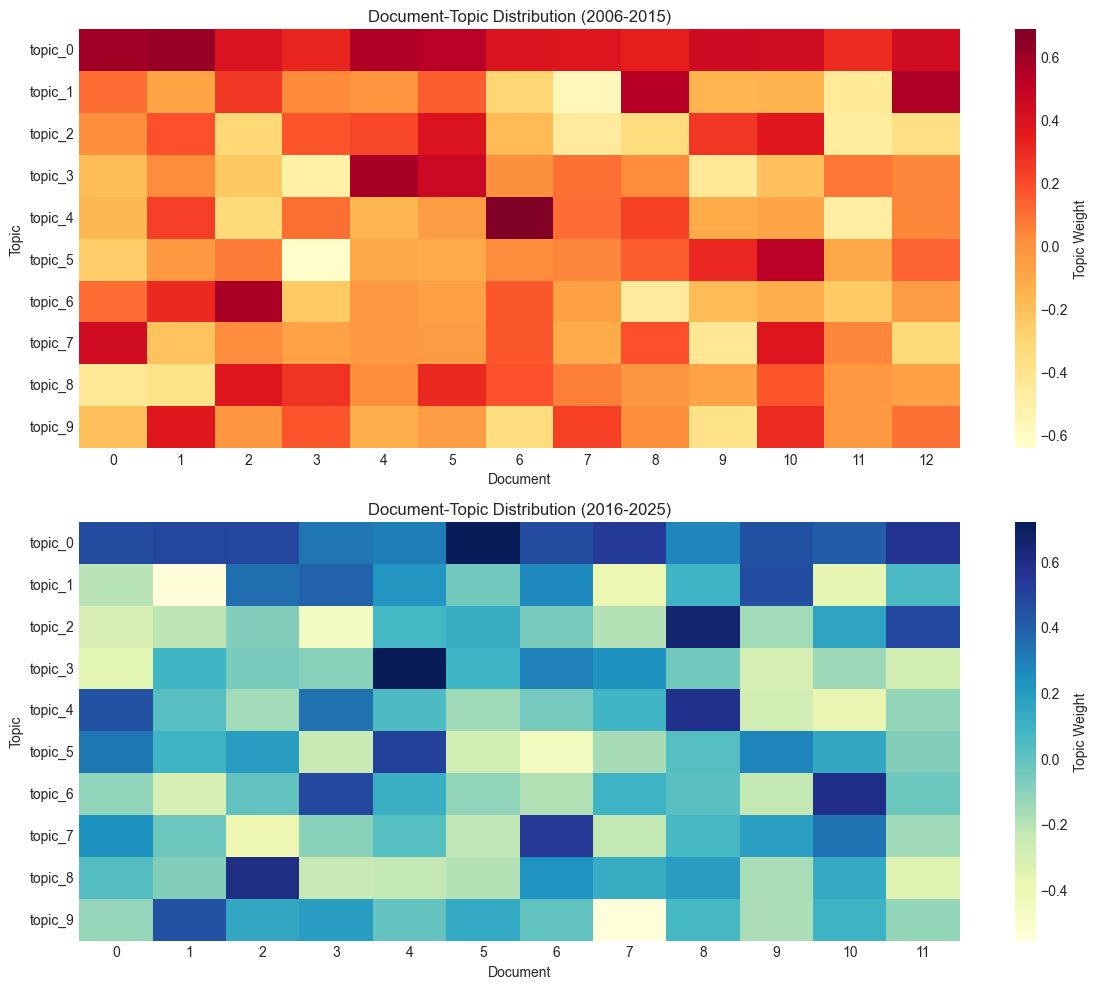

In [11]:
# Get document-topic matrices
doc_topics_2006 = lsa_2006['doc_topics'].filter(regex='^topic_')
doc_topics_2016 = lsa_2016['doc_topics'].filter(regex='^topic_')

# Plot heatmaps
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# 2006-2015
sns.heatmap(doc_topics_2006.T, cmap='YlOrRd', ax=axes[0], cbar_kws={'label': 'Topic Weight'})
axes[0].set_xlabel('Document')
axes[0].set_ylabel('Topic')
axes[0].set_title('Document-Topic Distribution (2006-2015)')

# 2016-2025
sns.heatmap(doc_topics_2016.T, cmap='YlGnBu', ax=axes[1], cbar_kws={'label': 'Topic Weight'})
axes[1].set_xlabel('Document')
axes[1].set_ylabel('Topic')
axes[1].set_title('Document-Topic Distribution (2016-2025)')

plt.tight_layout()
plt.show()

## 9. Topic Prevalence Comparison

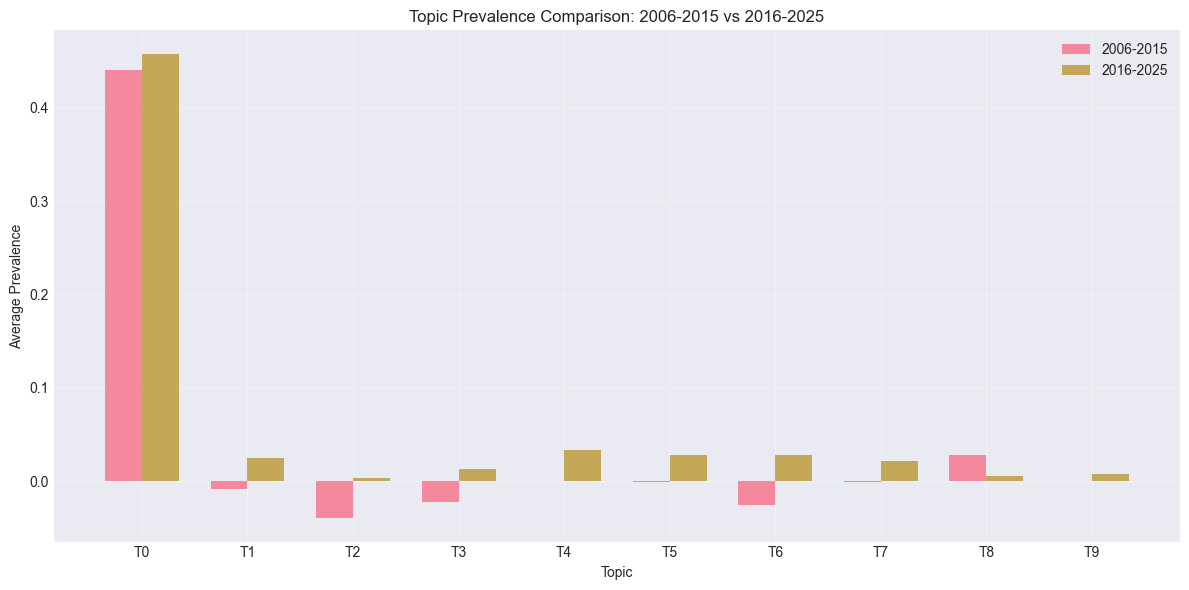

In [19]:
# Calculate average topic prevalence
topic_prev_2006 = doc_topics_2006.mean()
topic_prev_2016 = doc_topics_2016.mean()

# Create comparison plot
fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(len(topic_prev_2006))
width = 0.35

bars1 = ax.bar(x - width/2, topic_prev_2006, width, label='2006-2015', alpha=0.8)
bars2 = ax.bar(x + width/2, topic_prev_2016, width, label='2016-2025', alpha=0.8)

ax.set_xlabel('Topic')
ax.set_ylabel('Average Prevalence')
ax.set_title('Topic Prevalence Comparison: 2006-2015 vs 2016-2025')
ax.set_xticks(x)
ax.set_xticklabels([f'T{i}' for i in range(len(topic_prev_2006))])
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 10. Load Comparison Reports

In [25]:
# Load comparison CSVs
lsa_comparison = catalog.load('lsa_topic_comparison')
lda_comparison = catalog.load('lda_topic_comparison')

print("\n=== LSA Topic Comparison ===")
display(lsa_comparison)

print("\n=== LDA Topic Comparison ===")
display(lda_comparison)


=== LSA Topic Comparison ===


,period,topic_id,top_terms,avg_prevalence,explained_variance
0,2006-2015,0,"部落, 泰雅族, 原住民, 庫斯, 傳統, 泰雅, 文化, 司馬, 族人, 鎮西堡, 依倚,...",0.440798,0.012199
1,2006-2015,1,"警方, 現場, 樹林, 發現, 突然, 打獵, 公尺, 有人, 打電話, 不到, 相驗, 不...",-0.008538,0.130757
2,2006-2015,2,"傳統, 鎮西堡, 小米, 鎮西堡 部落, 部落, 依倚, 文化, 庫斯 部落, 領域, 協會...",-0.039699,0.118949
3,2006-2015,3,"依倚, 庫斯 部落, 庫斯, 司馬, 拉互, 拉互 依倚, 司馬 庫斯, 領域, 故事, 臉...",-0.021802,0.109253
4,2006-2015,4,"雲天, 原民會, 公尺, 鄉長, 鄉長 雲天, 當地, 縣長, 邱鏡淳, 民族, 萬元, 觀...",0.000476,0.097286
5,2006-2015,5,"小米, 鎮西堡, 鎮西堡 部落, 協會 理事, 不能, 理事, 每年, 祖靈, 部落, 傳統...",-0.001238,0.089542
6,2006-2015,6,"突然, 祖靈, 出現, 泰雅族, 墜谷, 族人, 事件, 雲天, 峭壁, 參加, 祈福, 不...",-0.024973,0.080490
7,2006-2015,7,"小米, 發現, 豪雨, 而且, 可能, 因為, 日本, 可以, 許多, 尖石 鄉後山, 鄉後...",-0.000967,0.072447
8,2006-2015,8,"祖靈, 事件, 突然, 當地, 有人, 東方, 依倚, 庫斯 部落, 兼具, 導覽, 鄰近,...",0.028223,0.068480
9,2006-2015,9,"傳統, 小米, 發展, 台灣, 交通不便, 泰雅族 傳統, 地方, 保留, 牧師, 教育, ...",0.000733,0.061971



=== LDA Topic Comparison ===


,period,topic_id,top_terms,avg_prevalence
0,2006-2015,0,"部落, 泰雅族, 庫斯, 依倚, 傳統, 司馬, 庫斯 部落, 文化, 司馬 庫斯, 原住民...",0.230028
1,2006-2015,1,"泰雅, 一名, 家人, 不過, 身體, 目前, 母親, 老人, 百歲, 當時, 人瑞, 昨天...",0.076999
2,2006-2015,2,"族人, 生活, 泰雅, 上山, 民族, 人瑞, 感謝, 縣長, 母親, 老人, 邱鏡淳, 相...",0.077243
3,2006-2015,3,"祖靈, 突然, 族人, 出現, 發現, 西堡, 九月, 事件, 有人, 泰雅族, 表示, 墜...",0.077386
4,2006-2015,4,"警方, 多年, 打獵, 樹林, 發現, 夜間, 可能, 原住民, 留在 現場, 加上, 留在...",0.076545
5,2006-2015,5,"部落, 小米, 泰雅族, 泰雅族 傳統, 文化, 傳統, 方式, 泰雅, 原住民, 歷史, ...",0.001646
6,2006-2015,6,"小米, 部落, 當地, 因為, 公尺, 而且, 鄉後山, 原民會, 雲天, 尖石 鄉後山, ...",0.152031
7,2006-2015,7,"部落, 原住民, 公尺, 最近, 現場, 山谷, 發現, 青年, 遊客, 鎮西堡, 警方, ...",0.229618
8,2006-2015,8,"公所, 當年, 表示, 體驗, 尖石 公所, 觀光產業, 保留, 觀光, 導覽, 兼具, 公...",0.076860
9,2006-2015,9,"建設, 相當, 甚至, 通常, 山谷, 尖石 泰雅族, 可以, 不少, 加上, 隨處, 公里...",0.001646


## 11. Visualize Topic Evolution

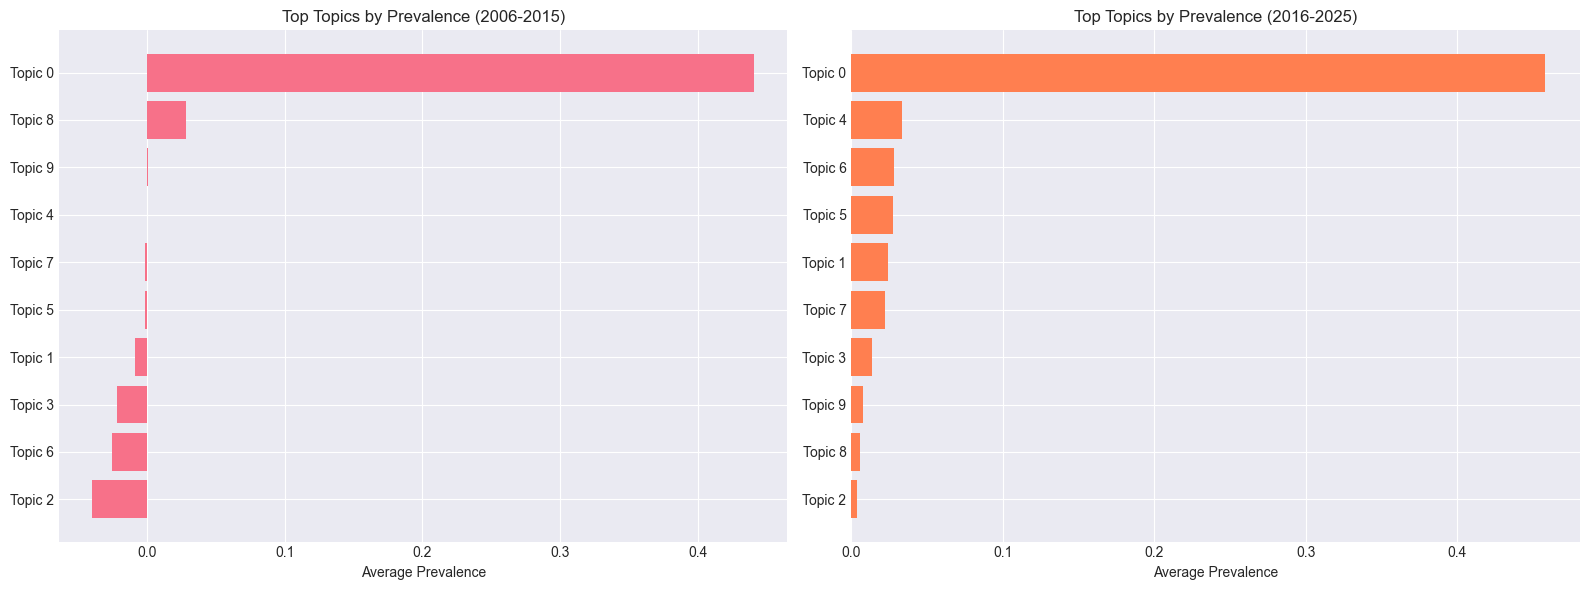

In [26]:
# Filter by period and plot prevalence
lsa_2006_comp = lsa_comparison[lsa_comparison['period'] == '2006-2015'].sort_values('avg_prevalence', ascending=False)
lsa_2016_comp = lsa_comparison[lsa_comparison['period'] == '2016-2025'].sort_values('avg_prevalence', ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 2006-2015 top topics
axes[0].barh(range(len(lsa_2006_comp)), lsa_2006_comp['avg_prevalence'])
axes[0].set_yticks(range(len(lsa_2006_comp)))
axes[0].set_yticklabels([f"Topic {i}" for i in lsa_2006_comp['topic_id']])
axes[0].set_xlabel('Average Prevalence')
axes[0].set_title('Top Topics by Prevalence (2006-2015)')
axes[0].invert_yaxis()

# 2016-2025 top topics
axes[1].barh(range(len(lsa_2016_comp)), lsa_2016_comp['avg_prevalence'], color='coral')
axes[1].set_yticks(range(len(lsa_2016_comp)))
axes[1].set_yticklabels([f"Topic {i}" for i in lsa_2016_comp['topic_id']])
axes[1].set_xlabel('Average Prevalence')
axes[1].set_title('Top Topics by Prevalence (2016-2025)')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

## 12. Save Visualizations

In [28]:
# Create output directory
import os
output_dir = '../data/08_reporting/visualizations'
os.makedirs(output_dir, exist_ok=True)

print(f"Visualizations will be saved to: {output_dir}")
print("Run the cells above again and add .savefig() to save specific plots")

Visualizations will be saved to: ../data/08_reporting/visualizations
Run the cells above again and add .savefig() to save specific plots
